In [64]:

#import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## PART 1 - DOMAIN: Healthcare

**Import and merge data:**

In [1]:
n= pd.read_csv('Part1 - Normal.csv')
h= pd.read_csv('Part1 - Type_H.csv')
s= pd.read_csv('Part1 - Type_S.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Remove duplicates**

In [2]:
print("Duplicate labels found in dataset:")
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

Duplicate labels found in dataset:
['Normal' 'Nrmal'] ['Type_H' 'type_h'] ['Type_S' 'tp_s']


In [3]:
h['Class'] =h['Class'].str.replace('type_h','Type_H')
n['Class'] =n['Class'].str.replace('Nrmal','Normal')
s['Class'] =s['Class'].str.replace('tp_s','Type_S')
print("Adjusting dataset to have appropriate class:")
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

Adjusting dataset to have appropriate class:
['Normal'] ['Type_H'] ['Type_S']


In [4]:
#reformatting for visualisation
h['Class'] =h['Class'].str.replace('Type_H','Type H')
s['Class'] =s['Class'].str.replace('Type_S','Type S')
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

['Normal'] ['Type H'] ['Type S']


## Creating a function to understand each dataset independently

In [6]:
def cleansing (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",s.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nDimension of Dataset:\033[0m",x.ndim)  

In [7]:
def correlate(x):
    cl=x.Class.nunique()
    if cl>2:
        cls="Mixed"
    else:
        cls=x.Class[0] 
    print(f"\033[1m\nDiagonal Correlation Heat Map Type: {cls}\033[0m\n")
    corr = x.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    ax = sns.heatmap(
        corr,mask=mask, 
        vmin=-1,vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,linewidths=.5, cbar_kws={"shrink": .5})
   
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');

In [8]:
def distribution(x):
    cl=x.Class.nunique()
    if cl>2:
        cls="Mixed"
    else:
        cls=x.Class[0]  
    
    print(f"\033[1m\nDistribution Observed In Dataset Type: {cls}\033[0m\n")
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,6));
    sns.histplot( x["P_incidence"] , color="skyblue", ax=ax1)
    ax1.set_title("Incidence");
    sns.histplot( x["P_tilt"] , color="dimgray", ax=ax2);
    ax2.set_title("Tilt");
    sns.histplot( x["L_angle"] , color="olive", ax=ax3);
    ax3.set_title("Angle");
    sns.histplot( x["S_slope"] , color="gold", ax=ax4);
    ax4.set_title("Slope");
    sns.histplot( x["P_radius"] , color="teal", ax=ax5);
    ax5.set_title("Radius");
    sns.histplot( x["S_Degree"] , color="seagreen", ax=ax6);
    ax6.set_title("Degree");
    
    plt.tight_layout();

## Analysing Dataset :Type N

In [9]:
cleansing(n)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

TAIL
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  Normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  Normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  Normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  Normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  Normal

DATA TYPES
 P_incidence    float64
P_tilt  


Distribution Observed In Dataset Type: Normal



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

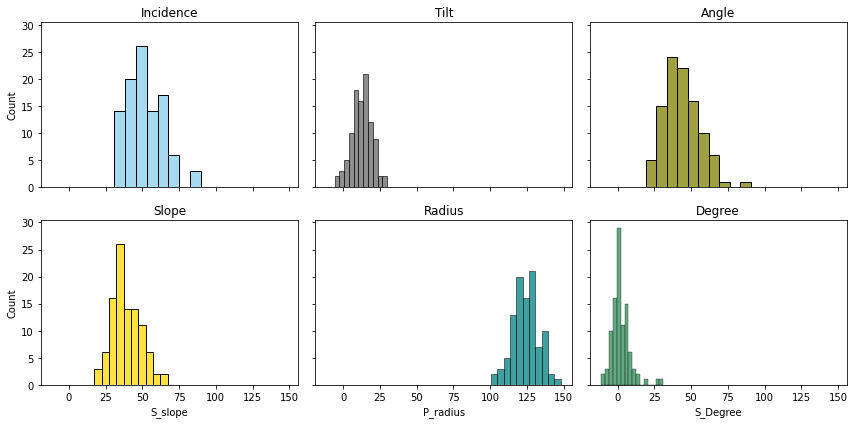

In [10]:
distribution(n)


Diagonal Correlation Heat Map Type: Normal



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

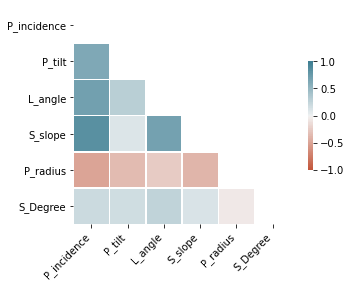

In [11]:
correlate(n)

## Analysing Dataset :Type H

In [12]:
cleansing(h)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type H

TAIL
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
55    47.657730  13.277385  36.679985  34.380345   98.249781  6.273012  Type H
56    43.349606   7.467469  28.065483  35.882137  112.776187  5.753277  Type H
57    46.855781  15.351514  38.000000  31.504267  116.250917  1.662706  Type H
58    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076  Type H
59    48.109236  14.930725  35.564683  33.178512  124.056452  7.947905  Type H

DATA TYPES
 P_incidence    float64
P_


Distribution Observed In Dataset Type: Type H



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

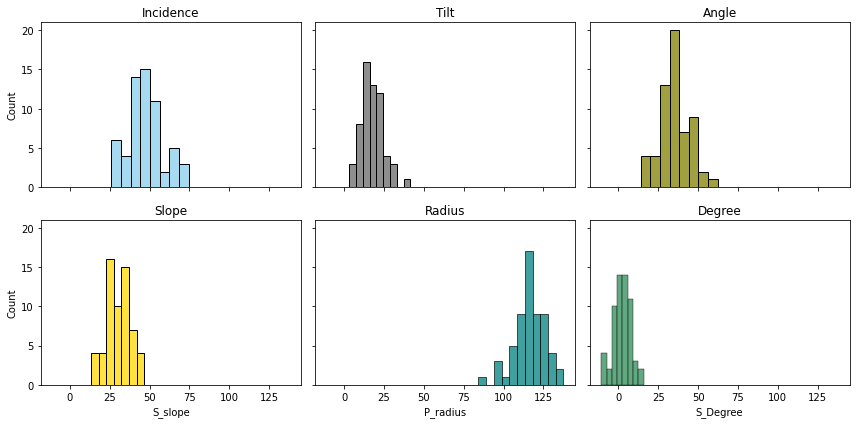

In [13]:
distribution(h)


Diagonal Correlation Heat Map Type: Type H



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

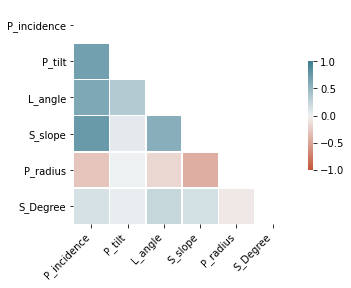

In [14]:
correlate(h)

## Analysing Dataset :Type S

In [15]:
cleansing(s)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type S

TAIL
      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
145  Type S  
146  Type S  
147  Ty


Distribution Observed In Dataset Type: Type S



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

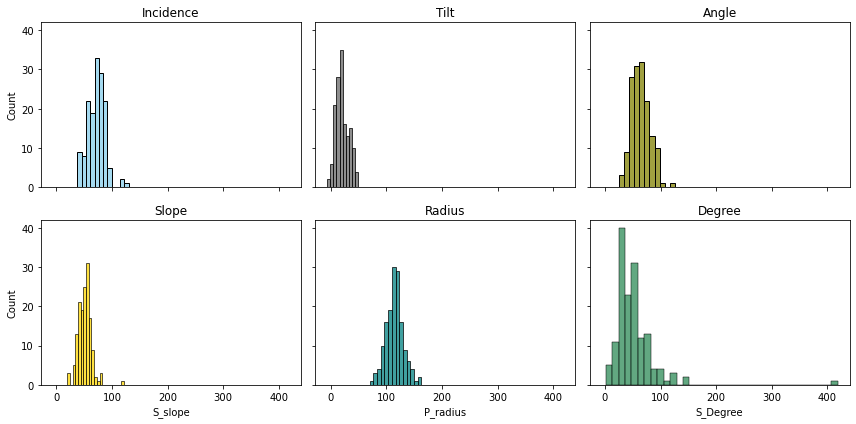

In [17]:
distribution(s)


Diagonal Correlation Heat Map Type: Type S



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

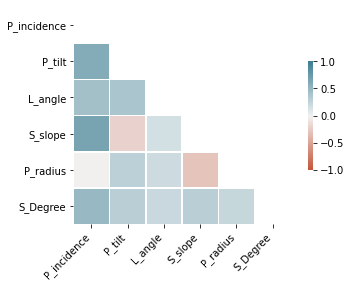

In [18]:
correlate(s)

## Merging All Datasets 

In [19]:
c = pd.concat(([n,h,s]), ignore_index=True)
c

<IPython.core.display.Javascript object>

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type S


**Visually confirming successful combination of all 3 datasets into 1**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

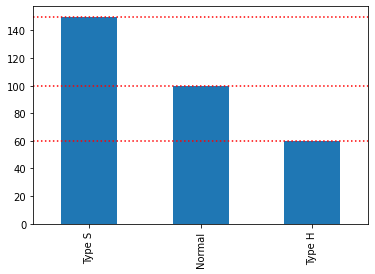

In [21]:
c.Class.value_counts().plot(kind = 'bar');
plt.axhline(y=(n.Class.count()), color='r', linestyle='dotted');
plt.axhline(y=(h.Class.count()), color='r', linestyle='dotted');
plt.axhline(y=(s.Class.count()), color='r', linestyle='dotted');

The number of type s is more than double of type h

## Using the same defined function to analyse and label the new combined data.

In [24]:
cleansing(c)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

TAIL
      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
305  Type S  
306  Type S  
307  Type S  

**INFERENCE<br>
-No empty row in dataset from count<br>
-Very high standard deviation fir column S_Degree<br>
-Max value of S_Degree column confirms something unusual which needs to be further checked<br>
-The huge gap between 75% and max value of S_Degree indicates some outliers with unusally high value**


Distribution Observed In Dataset Type: Mixed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

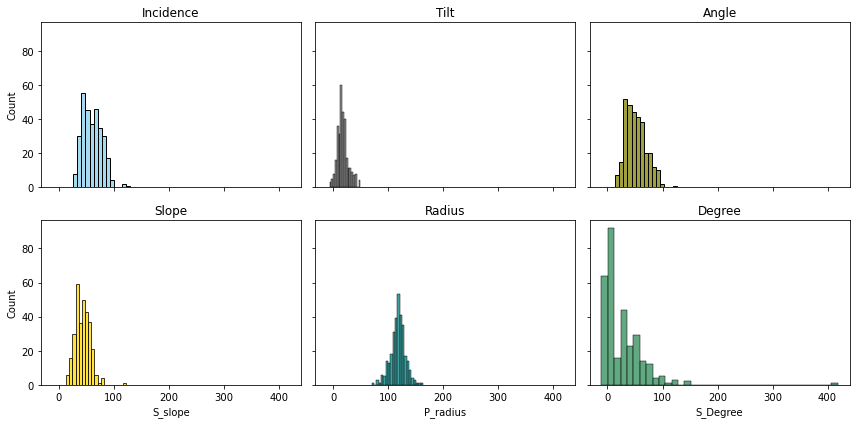

In [25]:
distribution(c)

**Outlier visualised in S_Degree**


Diagonal Correlation Heat Map Type: Mixed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

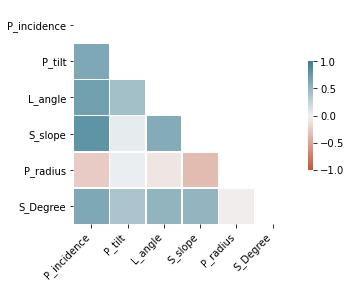

In [26]:
correlate(c)

## Overall co-relation of new combined dataset 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

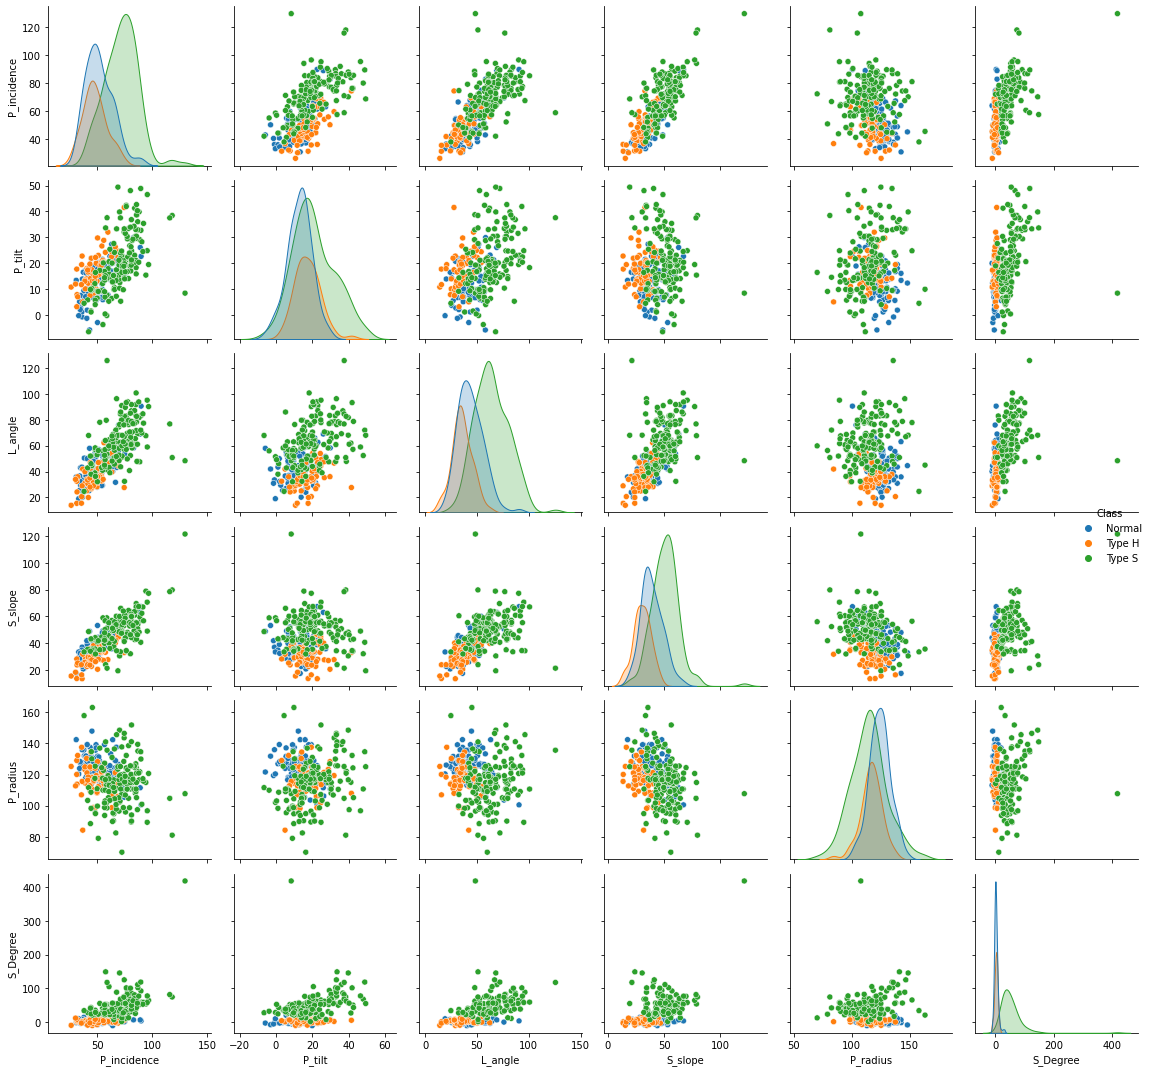

In [27]:
sns.pairplot(c,hue="Class")
plt.tight_layout();

**from pairplot it seems like type h and type s patients are opposite to each other
for example:type h maybe healthy patients and type s maybe sick.....checking hypothesis by comparing distribution of type h and type s**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

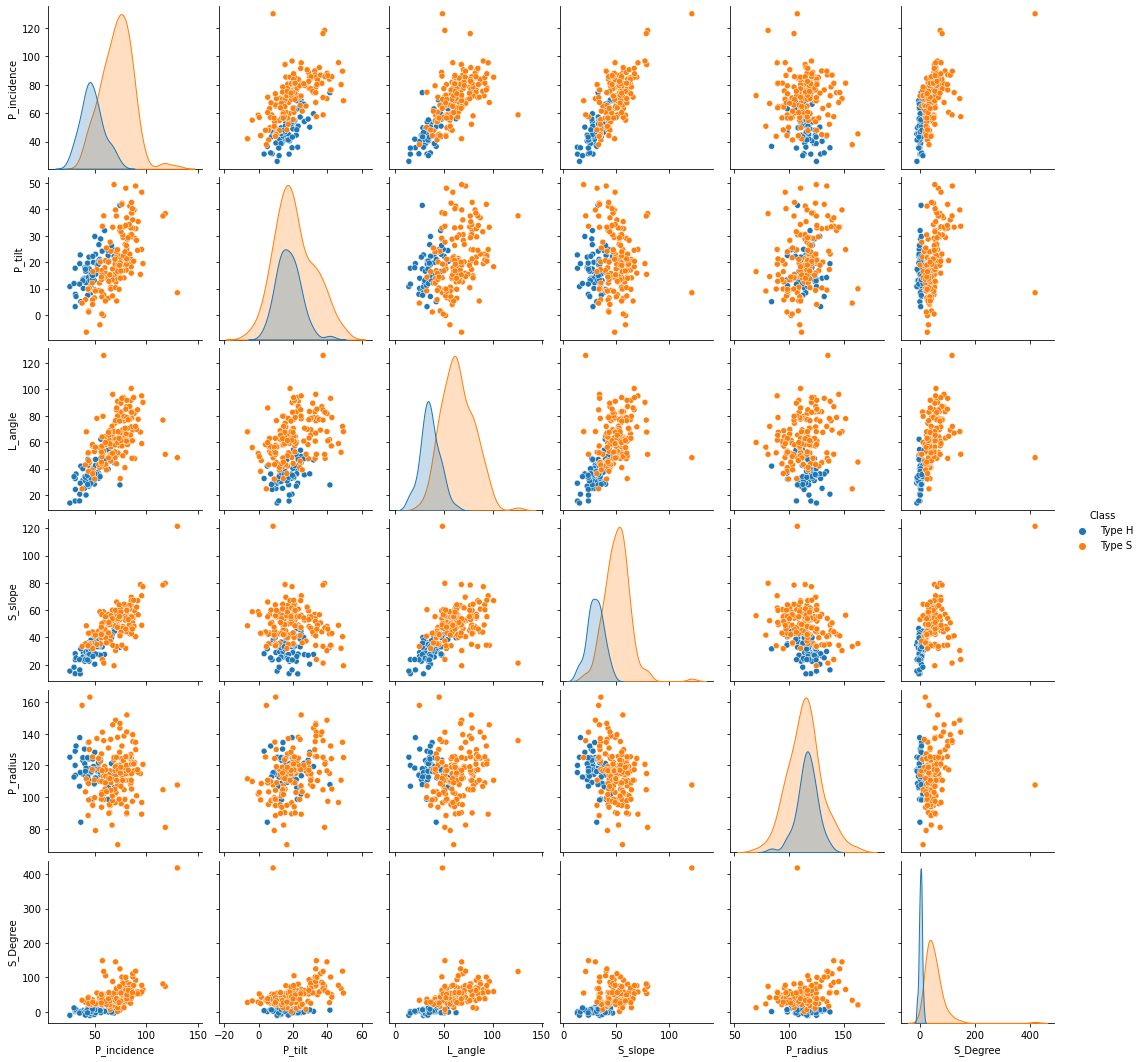

In [29]:
hs = pd.concat(([h,s]), ignore_index=True)
sns.pairplot(hs,hue="Class");

**As we can see most data would be easily classified using this dataset**

<IPython.core.display.Javascript object>

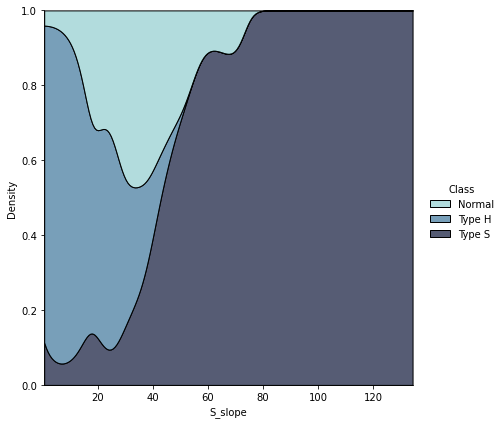

In [30]:
sns.displot(data=c,x="S_slope", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

**High values of S_slope (Above 80) gets classified as Type S**

<IPython.core.display.Javascript object>

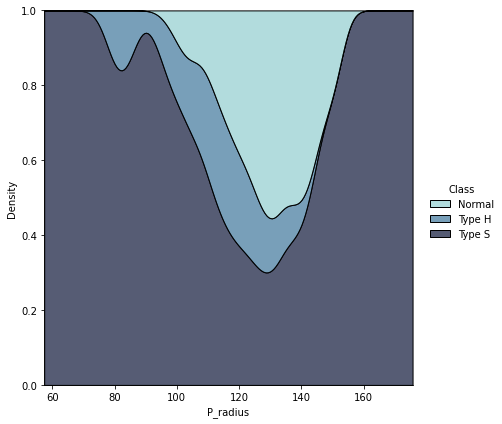

In [31]:
sns.displot(data=c,x="P_radius", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

<IPython.core.display.Javascript object>

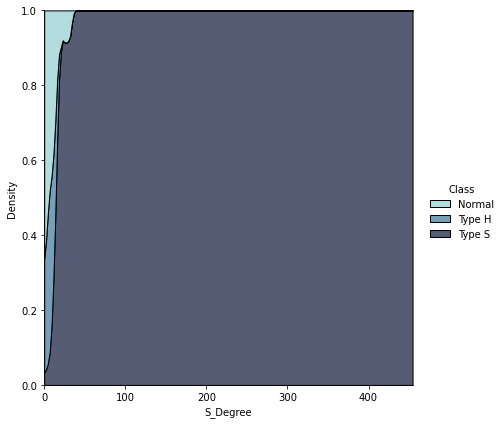

In [32]:
sns.displot(data=c,x="S_Degree", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

**Outliers might be present here but a direct correlation can be assumed between S_Degree and Type S Classification**

## Identifying outlier

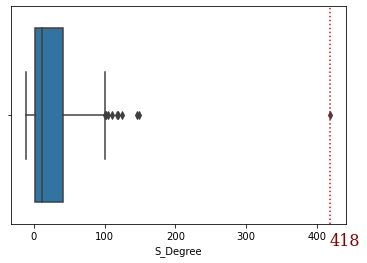

In [37]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}
sns.boxplot(c["S_Degree"]);
out=int(c["S_Degree"].max())
plt.axvline(x=([c["S_Degree"].max()]), color='r', linestyle='dotted');
plt.text(out,.6, out,fontdict=font );

**Dropping outlier row with very high max value**

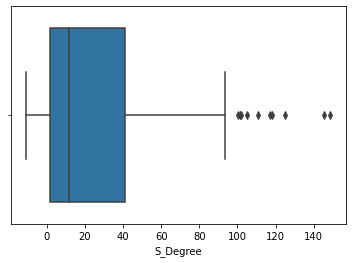

In [39]:
q = c["S_Degree"].max()
c1=c[c["S_Degree"] < q]
sns.boxplot(c1["S_Degree"]);

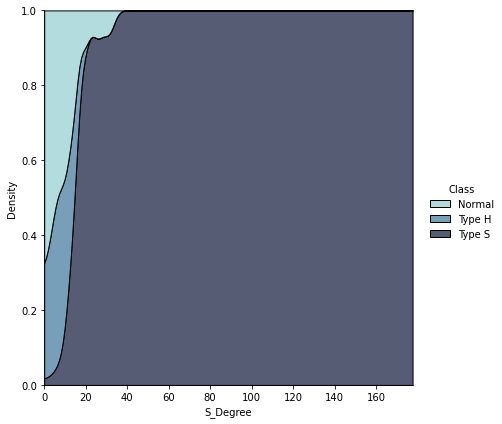

In [40]:
sns.displot(data=c1,x="S_Degree", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

**INFERENCE<br>
Even after the very high outlier value a direct correlation can be seen between high values of S_Degree and Type S Classification<br>
Confirming the same with bar plot**

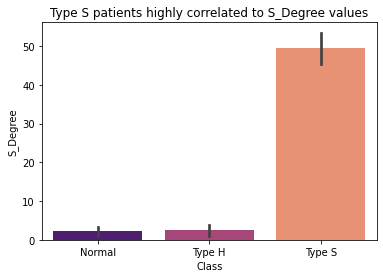

In [41]:
sns.barplot(x='Class', y='S_Degree', data=c1,palette ='magma');
plt.title('Type S patients highly correlated to S_Degree values');


Distribution Observed In Dataset Type: Mixed



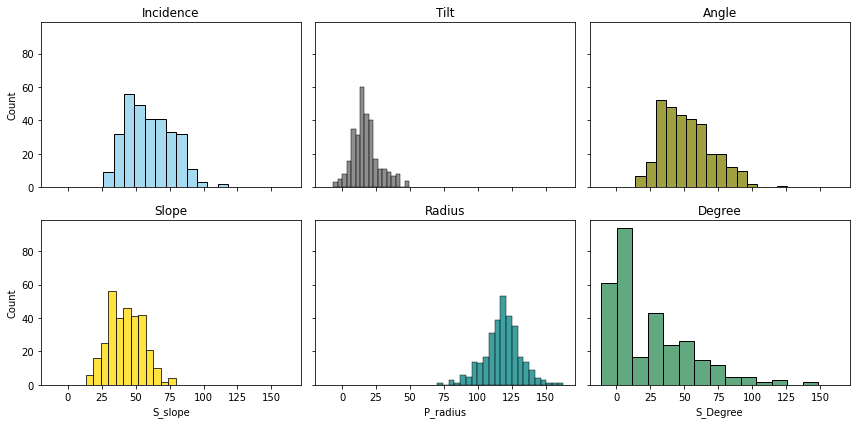

In [42]:
distribution(c1)

## EDA 

**Comparing Type H and Type S as they are visually easier to decipher without the normal classfication<br>
which is always overlapping between these two classifications<br>
For example consider joint plot with combined dataset**

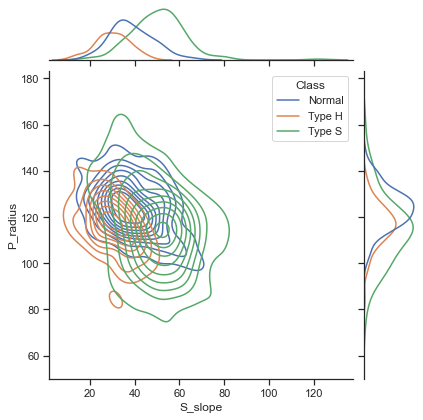

In [44]:
sns.set_theme(style="ticks")
sns.jointplot(data=c,x="S_slope", y="P_radius", hue="Class",kind="kde");

**Same jointplot without the set of people from normal classification**

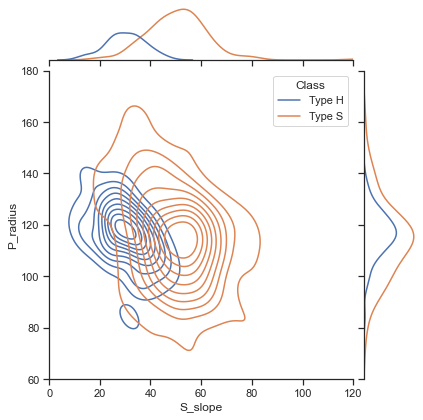

In [46]:
sns.set_theme(style="ticks")
plot=sns.jointplot(data=hs,x="S_slope", y="P_radius", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(0, 120)
plot.ax_marg_y.set_ylim(60, 180);

**INFERENCE<br>
P_ Radius : Beyond a threshold of deviation will get patient classifeid from Type H to Type S<br>
S_Slope is directly prroportional i.e a higher value of S_slope will tend to be classified as Type S**

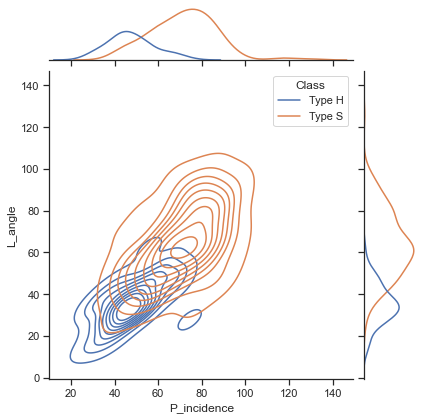

In [48]:
sns.jointplot(data=hs,x="P_incidence", y="L_angle", hue="Class",kind="kde");

**INFERENCE<br>
P_incidence and L_angle have a positive correlation w.r.t each other<br>
If both are low : Type H<br>
If both are high: Type S**

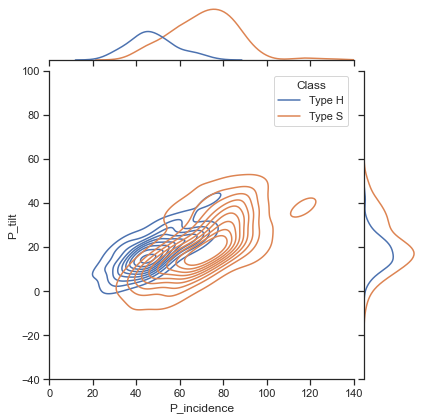

In [50]:
plot=sns.jointplot(data=hs,x="P_incidence", y="P_tilt", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(0, 140);
plot.ax_marg_y.set_ylim(-40,100);

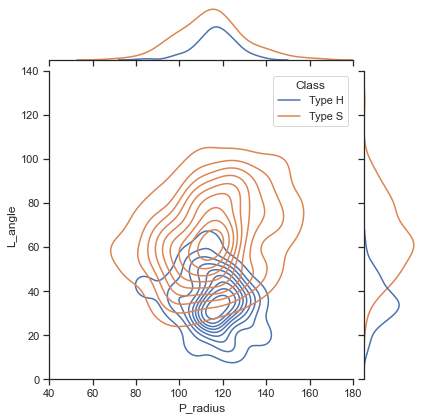

In [52]:
plot=sns.jointplot(data=hs,x="P_radius", y="L_angle", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(40,180 )
plot.ax_marg_y.set_ylim(0, 140);

**INFERENCE<br>
Higher L_angle values tend to be of Type S Classification**

In [54]:
c1.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.659553,0.739510,0.804772,-0.244163,0.642157
P_tilt,0.659553,1.000000,0.432809,0.084618,0.030461,0.534300
L_angle,0.739510,0.432809,1.000000,0.638521,-0.080903,0.672138
S_slope,0.804772,0.084618,0.638521,1.000000,-0.347722,0.429320
P_radius,-0.244163,0.030461,-0.080903,-0.347722,1.000000,-0.000023
S_Degree,0.642157,0.534300,0.672138,0.429320,-0.000023,1.000000


**INFERENCE<br>
-No coorelation between S_Degree and P_radius<br>
-Strong coorealtion between S_slope and P_incidence ~80%<br>
-Similiar strong relation was showed visually earlier between P_incidence and L_angle of ~74%**

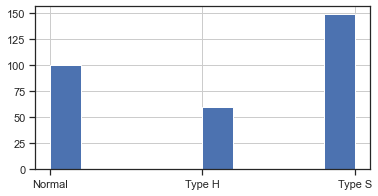

In [57]:
plt.figure(figsize=(6,3))
c1.Class.hist();

**There is a slight class imbalance which we may need to resolve if it affects our prediction.<br>
For now have made stratify=y in train_test_split so that the model can try to accurately map the classification**

## Model training, testing and tuning

In [89]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(c1.drop(["Class"],axis = 1),),
        columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius','S_Degree'])
y = c1.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train, y_train,)

In [91]:
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))
print(classification_report(y_true, y_pred))

k-NN score for training set: 0.927126
k-NN score for test set: 0.709677
              precision    recall  f1-score   support

      Normal       0.60      0.75      0.67        20
      Type H       0.36      0.33      0.35        12
      Type S       0.96      0.83      0.89        30

    accuracy                           0.71        62
   macro avg       0.64      0.64      0.64        62
weighted avg       0.73      0.71      0.71        62



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate. Our precision per class is varying due to imbalance in dataset.A weighted average gives a better overall reading, BUt since it is a medical dataset we would like this to go up.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. For a healthcare dataset its is essential that recall is prioritised and we can get as high a value for recall as possible.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 is usually more useful than accuracy, especially in an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall


## Find optimal value of k

In [92]:
# creating odd list of K for KNN
myList = list(range(3,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


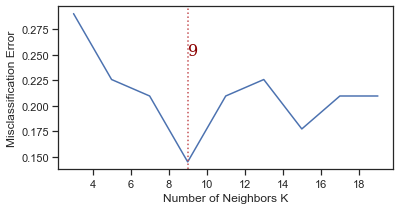

In [93]:
## plot misclassification error vs k
plt.figure(figsize=(6,3))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.axvline(x=(optimal_k), color='r', linestyle='dotted');
plt.text(optimal_k,.25, optimal_k,fontdict=font );

## Using best value for k in model

In [94]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model = knn.fit(X_train, y_train,)
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))
print(classification_report(y_true, y_pred))

k-NN score for training set: 0.821862
k-NN score for test set: 0.854839
              precision    recall  f1-score   support

      Normal       0.67      0.90      0.77        20
      Type H       0.57      0.33      0.42        12
      Type S       0.96      0.90      0.93        30

    accuracy                           0.79        62
   macro avg       0.73      0.71      0.71        62
weighted avg       0.79      0.79      0.78        62



**Using best k value has made a significant change.<br>
Model is predicting better, it is no longer overfitting.Infact test scores are now higher that training scores.<br>
Weighted average scores for precision and recall has increased to almost 80 percent.<br>
But,our individual classes are imbalanced, lets check if blancing input deatures will help in getting higher accuracy**

## Using SMOTE to adjust the class imbalance

In [96]:
oversample = SMOTE()
Xs_train,ys_train = oversample.fit_resample(X_train, y_train)

In [97]:
Xs_test,ys_test = oversample.fit_resample(X_test, y_test)

In [98]:
counter = Counter(ys_train)
print(counter)

Counter({'Type S': 119, 'Normal': 119, 'Type H': 119})


In [102]:
# creating odd list of K for KNN
myList = list(range(3,25))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xs_train, ys_train)
    # predict the response
    ys_pred = knn.predict(Xs_test)
    # evaluate accuracy
    scores = accuracy_score(ys_test, ys_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_ks = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_ks)

The optimal number of neighbors is 19


In [103]:
knn = KNeighborsClassifier(n_neighbors=optimal_ks)
smote_model=knn.fit(Xs_train, ys_train)

ys_true, ys_pred = ys_test, knn_model.predict(Xs_test)
print('k-NN score for training set: %f' % smote_model.score(Xs_train, ys_train))
print('k-NN score for test set: %f' % smote_model.score(Xs_test, ys_test))
print(classification_report(ys_true, ys_pred))

k-NN score for training set: 0.826331
k-NN score for test set: 0.844444
              precision    recall  f1-score   support

      Normal       0.63      0.90      0.74        30
      Type H       0.79      0.50      0.61        30
      Type S       0.96      0.90      0.93        30

    accuracy                           0.77        90
   macro avg       0.79      0.77      0.76        90
weighted avg       0.79      0.77      0.76        90



**Precision for classifying minor classes have slightly increased but the F1 scores have reduced.<br>
While a higher precision/recall is assumed to be a better way to judge this model, this cannot necessarily come at the expense of lower accuracy.**

In [104]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.8124801692226334
Best Parameters: {'n_neighbors': 5}


Gridsearch also does not help refining result, so we will follow the model using best n value

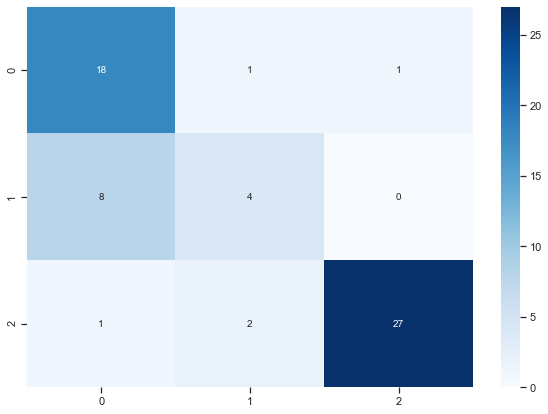

In [105]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

**Conclusion**

While the true positive rate and true negative rate is good there are quite a few misclassification for minority data.<br>
As we saw from bivariate and multivariate analysis differentiating between 'Type H' and 'Type S' is easier from the data availabe.<br>
To Classify Type N accurately in between the other 2 conditions we will need better features which associate with the class.<br>
Knn might not be the best approach maybe taking data to a different dimension like svm will be useful to cluster better.


## PART 2 - DOMAIN: Finance

**Import and merge data:**

In [116]:
df1= pd.read_csv('Part2 - Data1.csv',index_col=0)
df1

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
ID,,,,,,,
1,25,1,49,91107,4,1.6,1
2,45,19,34,90089,3,1.5,1
3,39,15,11,94720,1,1.0,1
4,35,9,100,94112,1,2.7,2
5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3
4997,30,4,15,92037,4,0.4,1
4998,63,39,24,93023,2,0.3,3


In [117]:
df2= pd.read_csv('Part2 - Data2.csv',index_col=0)
df2

,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,
1,0,1,0,0,0,NaN
2,0,1,0,0,0,NaN
3,0,0,0,0,0,NaN
4,0,0,0,0,0,NaN
5,0,0,0,0,1,NaN
...,...,...,...,...,...,...
4996,0,0,0,1,0,0.0
4997,85,0,0,1,0,0.0
4998,0,0,0,0,0,0.0


In [118]:
df = pd.concat([df1,df2], axis=1)            # axis =1 to maintain same number of rows
df

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0


**Data cleansing:**

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 546.9 KB


Indicates only 20 empty rows for the column "LoanOnCard"<br>
Will have to cross check if inputs made on other non null rows are appropriate<br>
All datatypes are integers except average is a float to give accurate value without rounding off

In [120]:
df["CustomerSince"].min()

-3

This looks like an incorrect value, investigating further

In [121]:
df0=df["CustomerSince"]==-1
df0.value_counts()

False    4967
True       33
Name: CustomerSince, dtype: int64

In [122]:
from collections import Counter
counter = Counter(df["CustomerSince"])
print(counter)

Counter({32: 154, 20: 148, 9: 147, 5: 146, 23: 144, 35: 143, 25: 142, 28: 138, 18: 137, 19: 135, 26: 134, 24: 131, 3: 129, 14: 127, 16: 127, 30: 126, 27: 125, 17: 125, 34: 125, 29: 124, 22: 124, 7: 121, 15: 119, 8: 119, 6: 119, 10: 118, 13: 117, 33: 117, 11: 116, 37: 116, 36: 114, 21: 113, 4: 113, 31: 104, 12: 102, 38: 88, 39: 85, 2: 85, 1: 74, 0: 66, 40: 57, 41: 43, -1: 33, -2: 15, 42: 8, -3: 4, 43: 3})


We can observed multiple negative values in this column which needs to be taken care of<br>
replacing these -ve values with 0

In [123]:
df["CustomerSince"].replace({-1: 0, -2: 0, -3: 0}, inplace=True)

Dropping the earier identififed nan rows.<br>
Since rest of the data seems good to use and is thus a very small subset so should not affect the model

In [124]:
df.dropna(inplace=True) 
df.shape

(4980, 13)

In [125]:
df.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


**Checking distribution of all features**

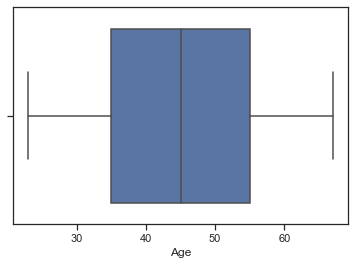

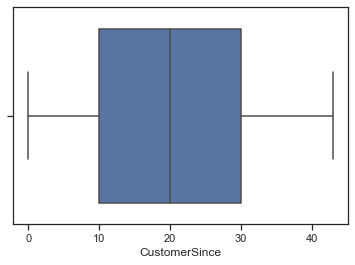

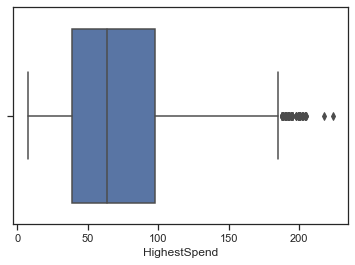

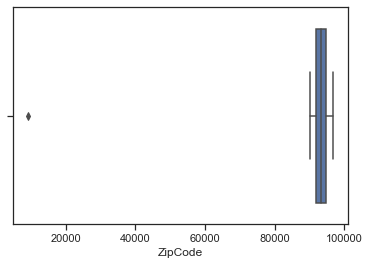

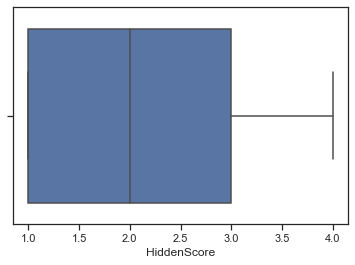

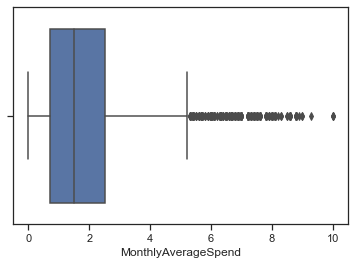

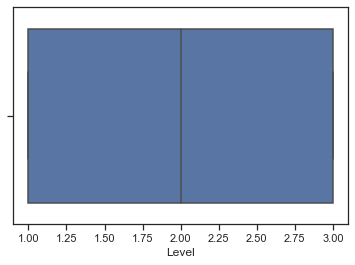

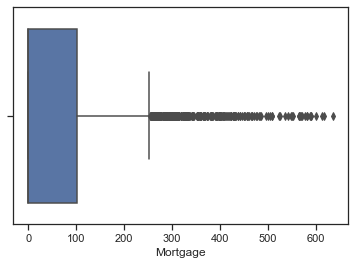

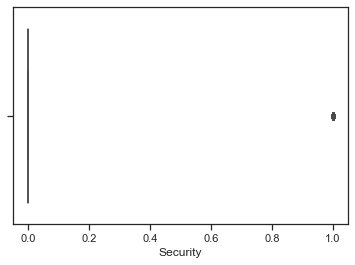

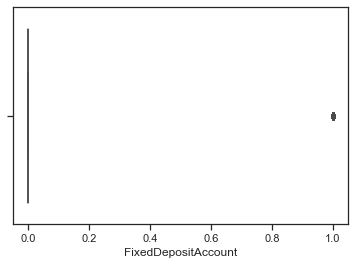

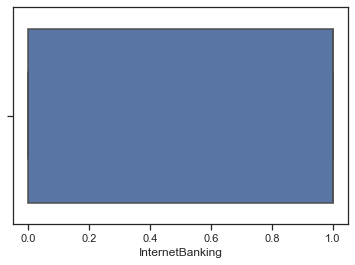

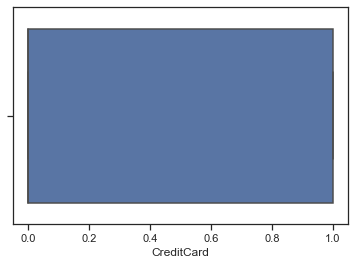

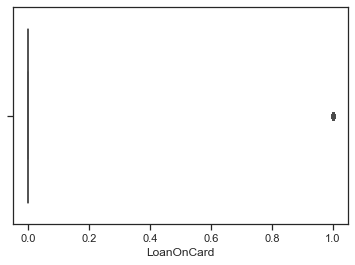

In [126]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

Age,CustomerSince columns are uniformly distributed<br>
HighestSpend,MonthlyAverageSpend  has a few outliers on the higher side and iqr shows most datapoints are towards the lower side<br>
This probably suggests an income-expenditure imbalance in the population or bias in data <br>
Mortgage column has many outliers<br>
Customers with a mortgage plus on average with higher monthly spend shoul be the target customers to advertise for loan<br>
HiddenScore of 4 is given to few customers, which might imply that 4 is the highest on scale of 1-4<br>
Zipcode seems to have an intentional outlier which we should look at<br>

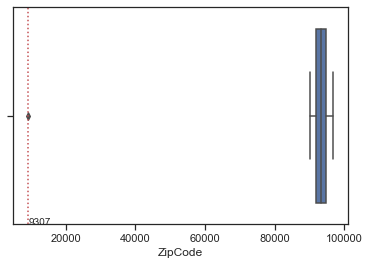

In [127]:
sns.boxplot(df["ZipCode"]);
out=int(df["ZipCode"].min())
plt.axvline(x=([df["ZipCode"].min()]), color='r', linestyle='dotted');
plt.text(out,.5, out);

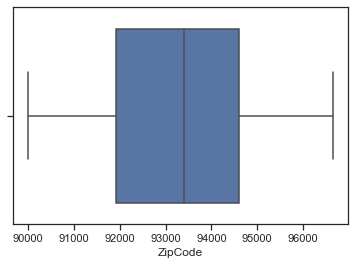

In [128]:
temp = df["ZipCode"].min()                      ##all orher values in zip code is 5 digit, ''9307'' seems to be an error
df=df[df["ZipCode"] > temp]
sns.boxplot(df["ZipCode"]);

Zipcode may be uniformly distributed now, but it might not be a significant factor for predicitng target

In [129]:
df.shape

(4979, 13)

**Scaling** the data  would help to eliminate some of the outliers.

In [130]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))

In [131]:
# taking a threshold of 4. Since dataframe is not very large using lower value is making data even more imbalanced.
df_trim = df[(z < 3.6).all(axis=1)]

In [132]:
df = df.reset_index(drop=True)
df_trim = df_trim .reset_index(drop=True)
df_trim.shape

(4609, 13)

In [133]:
df_trim["LoanOnCard"].value_counts()

0.0    4296
1.0     313
Name: LoanOnCard, dtype: int64

Scaling is not effective as it is making imbalanced classification even worse
Also some features are already scaled in equal bins or have ordered value
Maybe a minmax scaler on the continious columns would help.

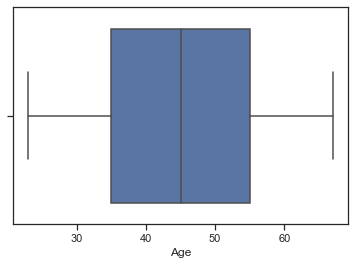

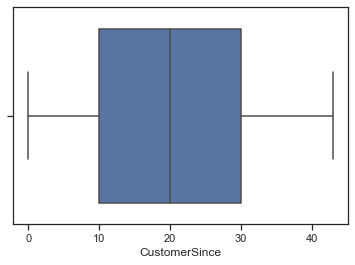

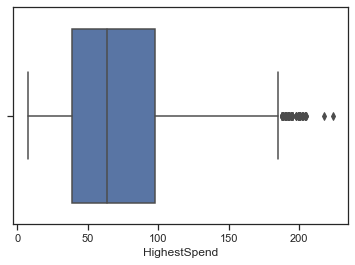

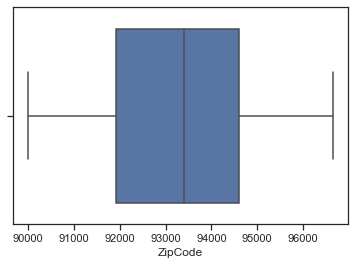

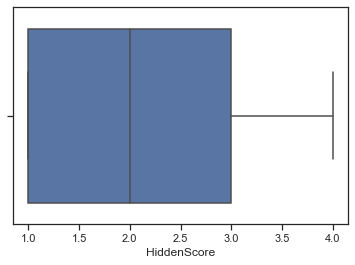

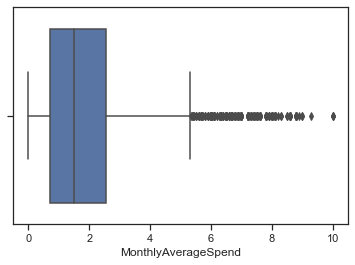

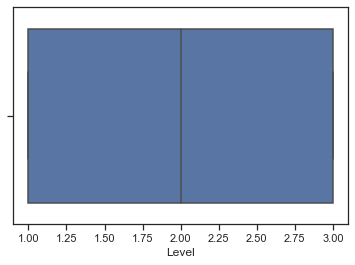

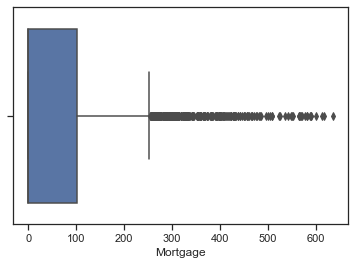

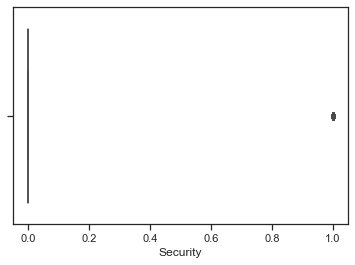

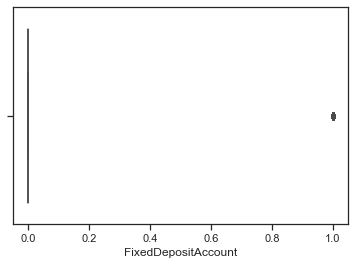

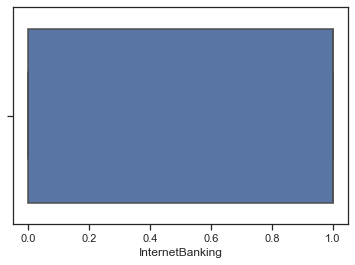

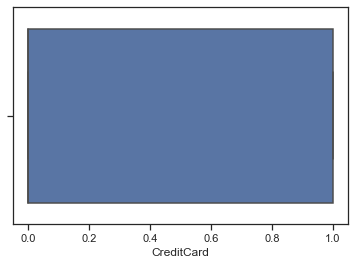

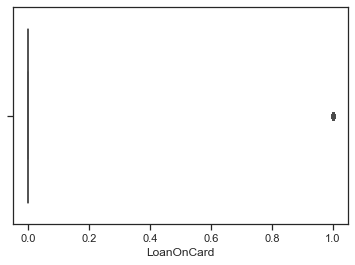

In [134]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

In [135]:
from sklearn.preprocessing import MinMaxScaler
#df_minmax[['Age', 'CustomerSince', 'HighestSpend','MonthlyAverageSpend', 'Mortgage']] = MinMaxScaler.fit_transform(df[['Age', 'CustomerSince', 'HighestSpend','MonthlyAverageSpend', 'Mortgage']])
scaler = StandardScaler()


# make a copy of dataframe
df_scaled = df.copy()

col_names = ['Age', 'CustomerSince', 'HighestSpend','MonthlyAverageSpend', 'Mortgage']
features = df_scaled[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

df_scaled[col_names] = features

the amount is scaled from 1-10, therefore treating any as outlier would have been incorrect as well

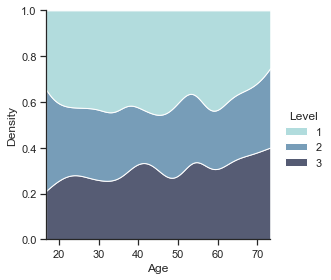

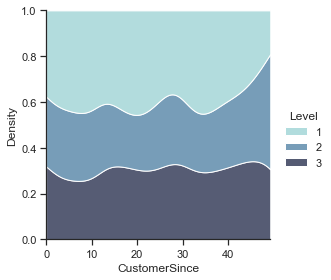

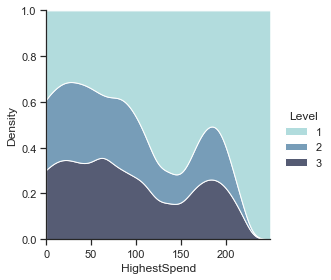

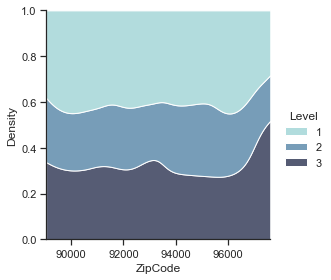

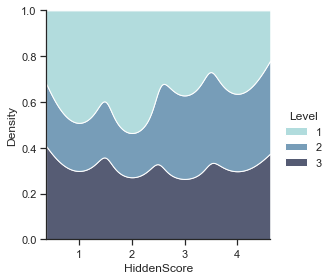

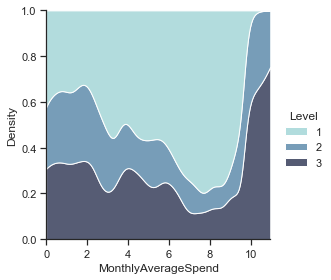

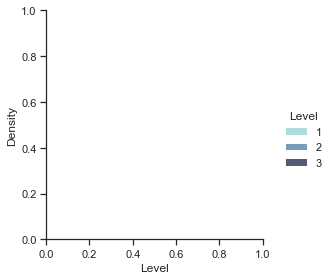

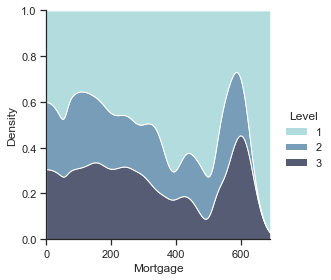

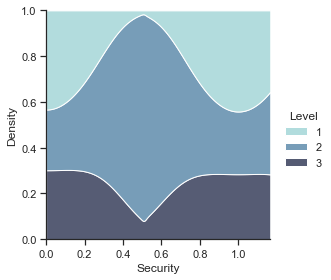

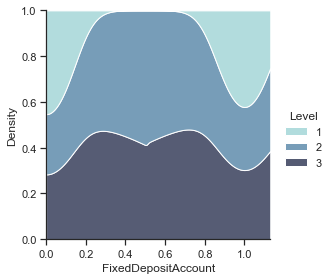

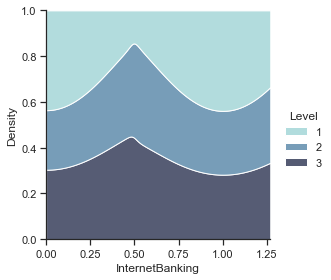

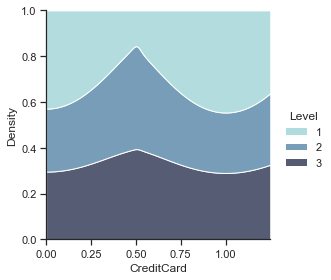

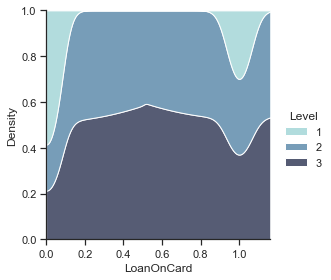

In [136]:
#Exploring feature 'Level' with Conditional kernel density estimate
for i in df.describe().columns:
    sns.displot(data=df,x=i, hue="Level",kind="kde", height=4,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");
    plt.show()

A higher categoirical value of 'Level' is likely to be given to a customer with :<br>
'HighestSpend','MonthlyAverageSpend', is high and already has a 'Mortgage'

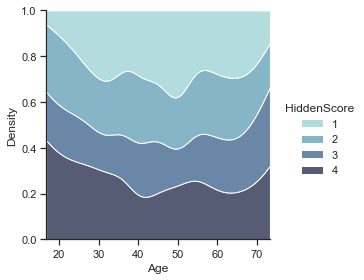

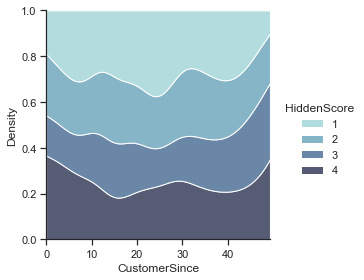

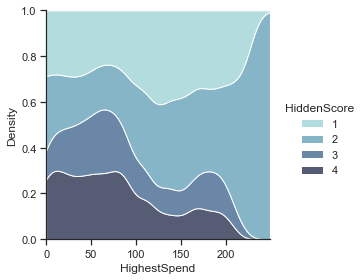

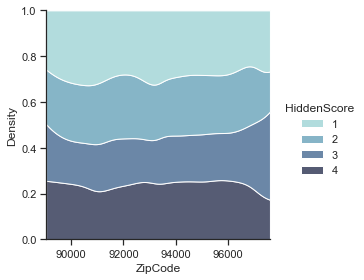

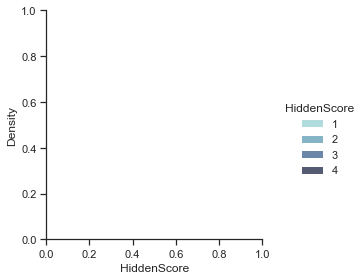

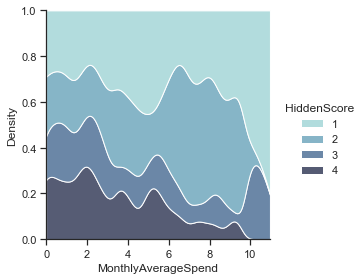

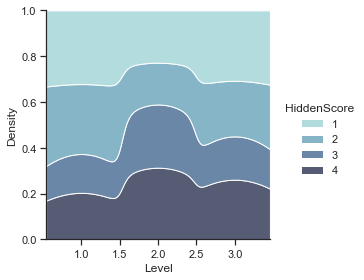

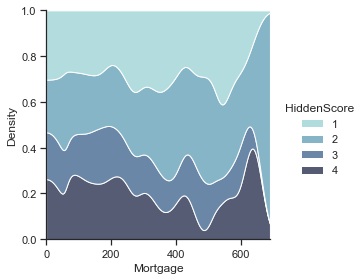

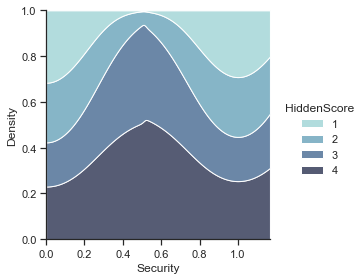

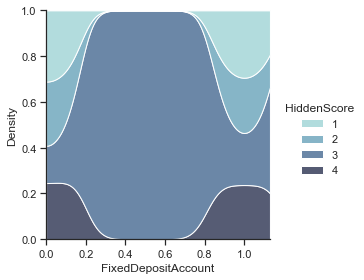

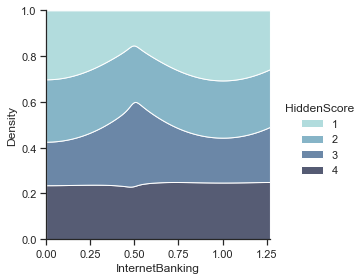

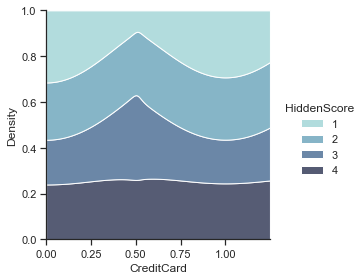

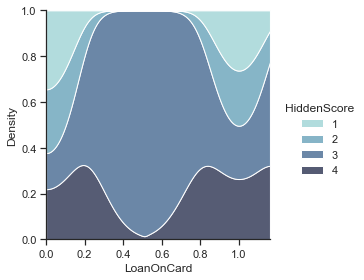

In [137]:
#Exploring feature 'HiddenScore' with Conditional kernel density estimate
for i in df.describe().columns:
    sns.displot(data=df,x=i, hue="HiddenScore",kind="kde", height=4,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");
    plt.show()

A higher categoirical value of Hidden Score is likely to be given to a customer with :<br>
'HighestSpend','MonthlyAverageSpend', is high and already has a 'FixedDepositAccount' and 'LoanOnCard'

In [138]:
df.nunique()

Age                     45
CustomerSince           44
HighestSpend           162
ZipCode                466
HiddenScore              4
MonthlyAverageSpend    108
Level                    3
Mortgage               347
Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
LoanOnCard               2
dtype: int64

Features with 2 unique values are all yes and no binary values.<br>
Lets check the balance in these columns to see if they are useful.

In [139]:
df["CreditCard"].value_counts(normalize=True)                    #slightly imb alanced

0    0.705764
1    0.294236
Name: CreditCard, dtype: float64

In [140]:
df["InternetBanking"].value_counts(normalize=True)               #almsost equal distribution across both types

1    0.597108
0    0.402892
Name: InternetBanking, dtype: float64

In [141]:
df["FixedDepositAccount"].value_counts(normalize=True)          #highly imbalanced, this might not help the prediction

0    0.939345
1    0.060655
Name: FixedDepositAccount, dtype: float64

In [142]:
df["Security"].value_counts(normalize=True)                     #imbalanced, this might not help the prediction

0    0.895561
1    0.104439
Name: Security, dtype: float64

0.0    0.903595
1.0    0.096405
Name: LoanOnCard, dtype: float64


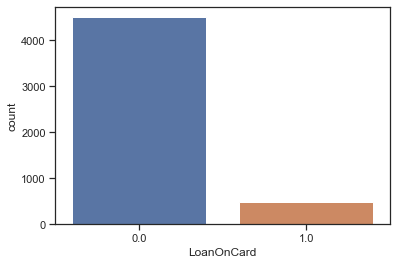

In [143]:
print(df["LoanOnCard"].value_counts(normalize=True))
sns.countplot('LoanOnCard',data=df);

Target features are imbalanced, only 9.64% have obted for LoanOnCard<br>
Lets find out top 15 features for which resusts to having a loan on card.

In [144]:
df_loan = df[df.LoanOnCard != 0]    #making a subset dataframe which has only people with loan on card

Age         34  30  63  35  36  29  54  33  52  43  65  42  56  44  50
LoanOnCard  18  17  16  16  16  15  15  15  15  15  14  14  14  14  13


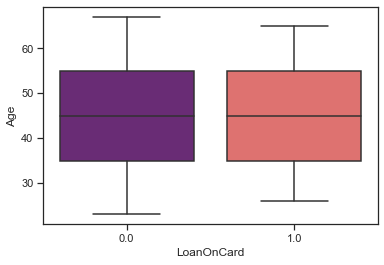

In [145]:
df_age = df_loan[['Age', "LoanOnCard"]].groupby(by='Age').count()
print(df_age.sort_values('LoanOnCard', ascending=False).head(n=15).transpose())

sns.boxplot(x='LoanOnCard', y='Age', data= df,palette ='magma');

Distribution of people are very similiar across both these groups even in overall dataset.Thus signifying it wont be a hghly contributing factor for prediction<br>
Maybe we shoud drop this column

CustomerSince  9   8   20  3   12  19  25  26  32  5   16  23  11  30  22
LoanOnCard     20  18  17  17  16  14  14  14  14  14  13  13  13  13  13


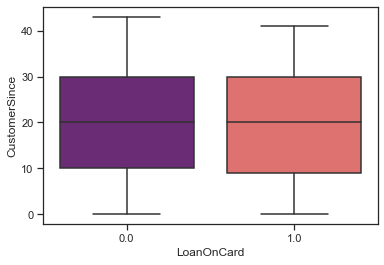

In [146]:
df_cust = df_loan[['CustomerSince', "LoanOnCard"]].groupby(by='CustomerSince').count()
print(df_cust.sort_values('LoanOnCard', ascending=False).head(n=15).transpose())

sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df,palette ='magma');

The number of years of being a Customer of the bank doesnt seem to be an incentive for taking a loan

ZipCode     94720  94305  92093  94304  90095  90089  92182  94022  95051
LoanOnCard     19     13      9      8      8      8      7      6      6


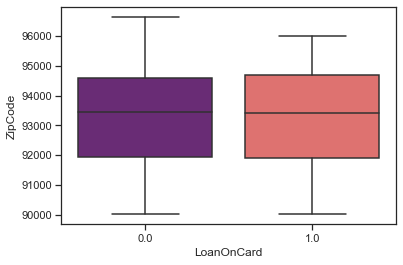

In [147]:
df_zip = df_loan[['ZipCode', "LoanOnCard"]].groupby(by='ZipCode').count()
print(df_zip.sort_values('LoanOnCard', ascending=False).head(n=9).transpose())

sns.boxplot(x='LoanOnCard', y='ZipCode', data= df,palette ='magma');

No specific branch seems to be doing better in giving out loans, probably location isnt a good indicator as well

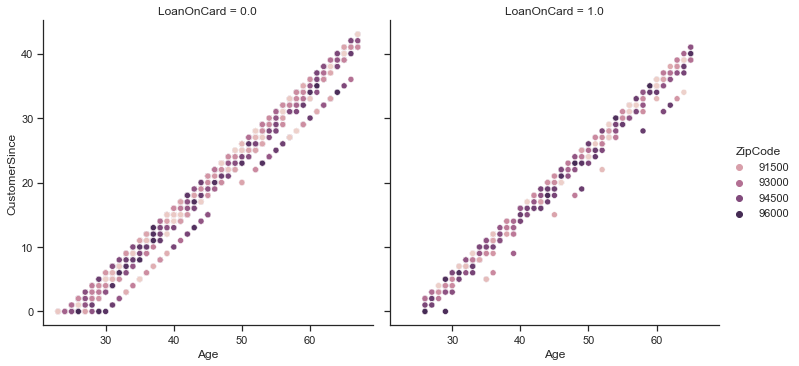

In [148]:
sns.relplot(x="Age", y="CustomerSince", hue="ZipCode",col="LoanOnCard", data=df);

Comparing all 3 we can confirm that age and the number of years and zipcode of a customer may not be influential in our outcome <br>
Customers who took a loan look like a subset of the same datset, no unique patterns emerge here<br>
But we should try this approach on other features and check

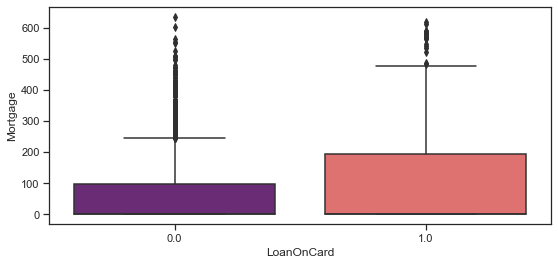

In [149]:
plt.figure(figsize=(9,4))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df,palette ='magma');

People with higher mortgage value tend to draw a loan.
The outliers in the column for people who havent taken a loan show the scope for new customers who may need a loan

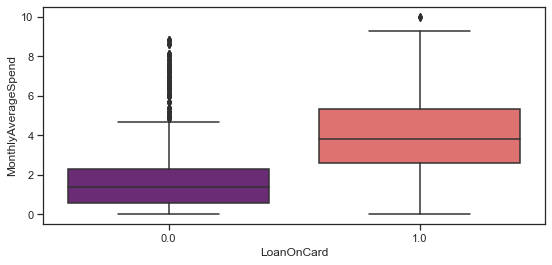

In [150]:
plt.figure(figsize=(9,4))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= df,palette ='magma');

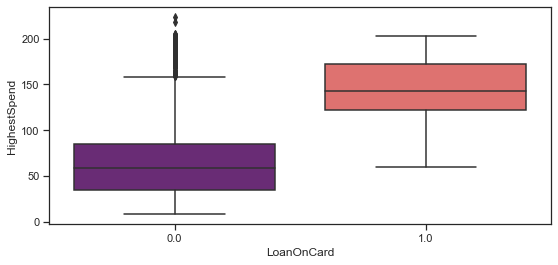

In [151]:
plt.figure(figsize=(9,4))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df,palette ='magma')

We can see a pattern emerging here, most people with loan have a higher monthly expenditure or highest one time spend value.<br>
Outliers on the group of people without a loan,may either have a loan from a different bank or are potential customers 

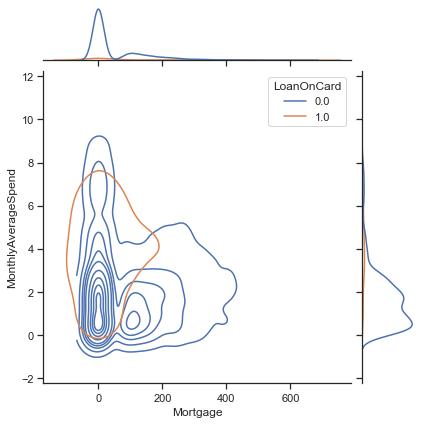

In [152]:
#plotting both of them together to check if a relationship emerges
sns.jointplot(data=df,x="Mortgage", y="MonthlyAverageSpend", hue="LoanOnCard",kind="kde")

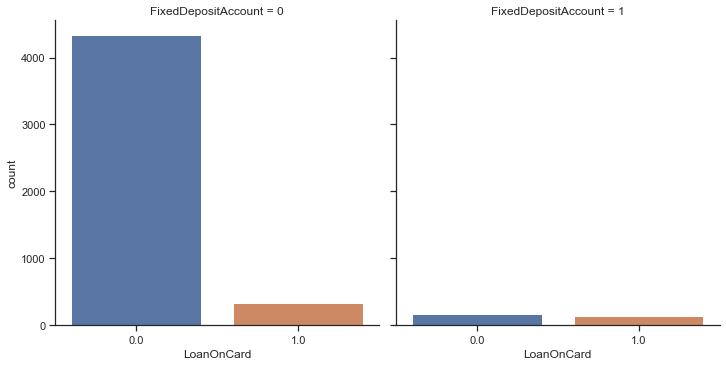

In [153]:
sns.factorplot(data=df,kind='count',x='LoanOnCard',col='FixedDepositAccount');
#The chances of taking a loan gets higher when u already have a Fixed Deposit account

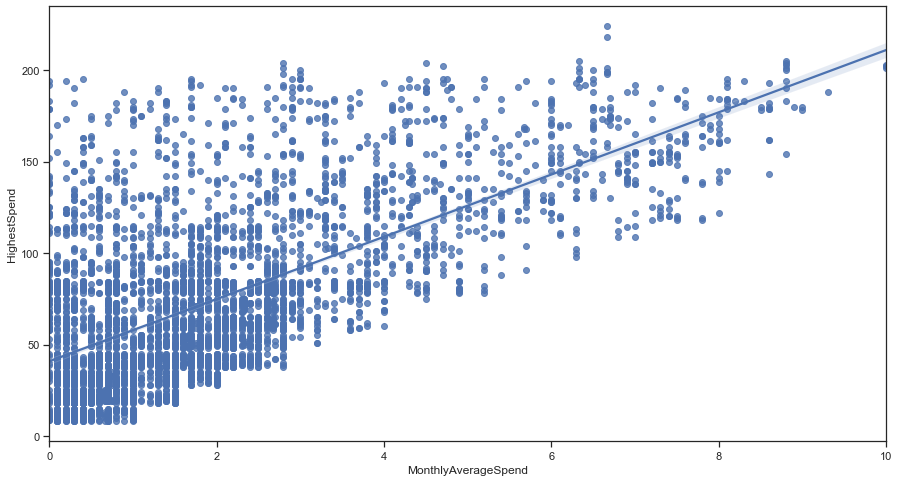

In [154]:
plt.figure(figsize=(15,8))
sns.regplot(x="MonthlyAverageSpend", y="HighestSpend", data=df);

As the name suggests , this relationship is very similiar and linear,if correlation is very high maybe we should use only 1 of thiese 2 columns

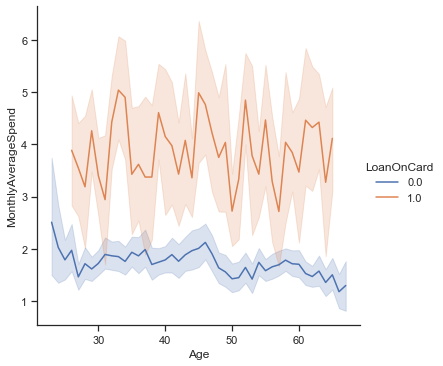

In [155]:
sns.relplot(x="Age", y="MonthlyAverageSpend", hue="LoanOnCard", kind="line", data=df);

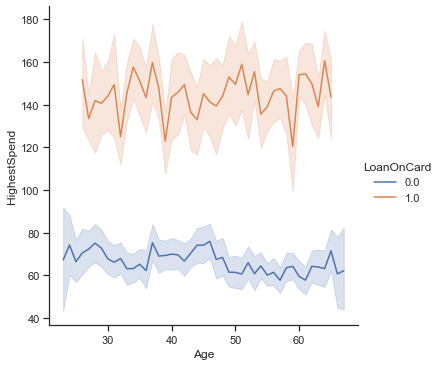

In [156]:
sns.relplot(x="Age", y="HighestSpend", hue="LoanOnCard", kind="line", data=df);

From the two plots above it is clear that those with higher expenditure have applied for loan.<br>
This seems like a logical conclusion,but are there other patterns within  influincing the target.<br>
Lets add more variables to this relationship in order to understand better.

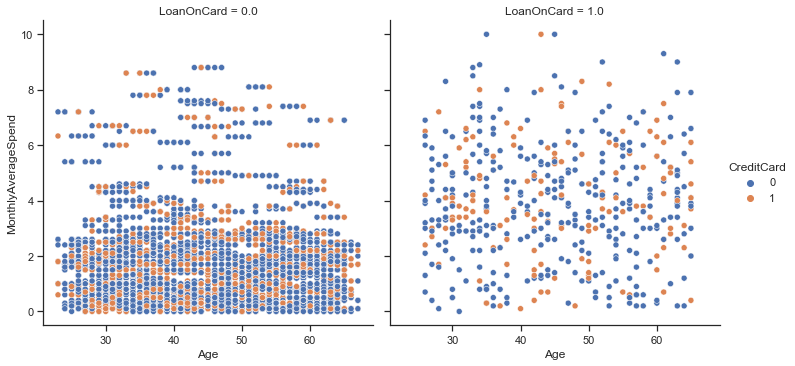

In [157]:
sns.relplot(x="Age", y="MonthlyAverageSpend", hue="CreditCard",col="LoanOnCard", data=df);

#Credit card doesnt seem to be a unique factor between the two groups of people with or without a loan 

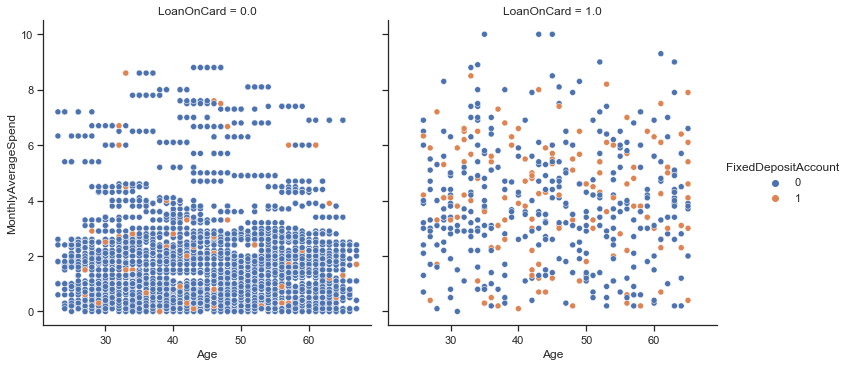

In [158]:
sns.relplot(x="Age", y="MonthlyAverageSpend", hue="FixedDepositAccount",col="LoanOnCard", data=df);

#Ratio of people with a fixed deposit account and a loan seem to be higher than those without a loan.
#A naive conclusion would be people who already have a large part of their money fixed for a limited time tend to take a loan.

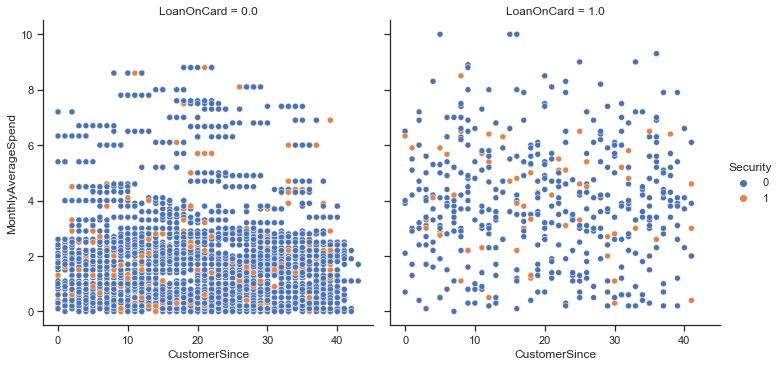

In [159]:
sns.relplot(x="CustomerSince", y="MonthlyAverageSpend", hue="Security",col="LoanOnCard", data=df);

Columns:'Age'and 'CustomerSince' show almost similar relation with all other featurestr
Customers spending more monthly have a lower HiddenScore, this realtionship does not translate to loans.<br>
Maybe more attractive offers should be made to encourage/motivate specific to classified customers

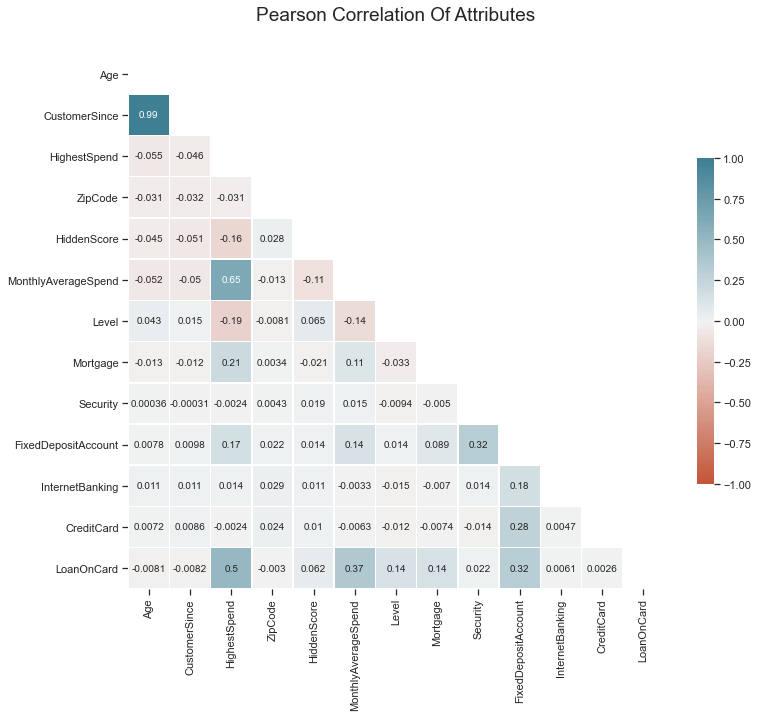

In [160]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(12,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap=sns.diverging_palette(20, 220, n=200)
plt.title('Pearson Correlation Of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(),mask=mask,linewidths=0.5,vmax=1.0,vmin=-1,center=0, 
            square=True, cmap=cmap, linecolor='white', annot=True, cbar_kws={"shrink": .5});

The Correlation map establishes some of the things we inferred above<br>
'Age' and 'CustomerSince' have a very high of bivariate correlation value as expected<br>
Similiarly 'HighestSpend'and'MonthlyAverageSpend' are usually seen in the same customer.<br>
'Level' and 'HighestSpend' have an inverse realtion as seen before as well<br>
The output has hgh correlation with 'HighestSpend','MonthlyAverageSpend' and 'FixedDepositSexurity' features<br>

Since similar results were seen on some columns we can assume there exists a degree of multicoliearity within the dataframe.
Hence detecting/calculating multicolinearity with VIF

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(v):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = v.columns
    vif["VIF"] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]

    high_vif = vif[vif["VIF"] > 5].sort_values("VIF",ascending=False)

    
    return(high_vif)

In [162]:
calc_vif(df)

,variables,VIF
0,Age,1348.931068
3,ZipCode,387.599602
1,CustomerSince,333.867473
2,HighestSpend,7.882979
6,Level,7.193206
4,HiddenScore,5.691006


In [163]:
calc_vif(df_scaled)

,variables,VIF
0,Age,93.062252
1,CustomerSince,92.954984
3,ZipCode,13.264719
6,Level,7.169664
4,HiddenScore,5.689971


'Age', 'CustomerSince'and 'ZipCode'have very high values indicates high multicollinearity between this independent variable and the others.<br>
Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features

In [164]:
#'Age' and 'CustomerSince' had .99 bivariate corealtion, having both will ot be helpful.
#'Age' itself has highest VIF value
# Hence dropping the feature
df_new=df.drop('Age',axis=1) 

In [165]:
df_new2=df_scaled.drop('Age',axis=1)       #Making identical copy from the scaled dataframe above.

In [166]:
# Dropping more columns is resulting in lower score of models.
#Probably since the overall dataframe is not very large large we will use this for modelling.

In [167]:
calc_vif(df_new)

,variables,VIF
2,ZipCode,24.405288
1,HighestSpend,7.882669
5,Level,6.722915
3,HiddenScore,5.680261


In [168]:
calc_vif(df_new2)
#Scaled data is shoiwing lower values for VIF

,variables,VIF
2,ZipCode,12.811810
5,Level,6.732709
3,HiddenScore,5.683136


In [169]:
#'ZipCode' now has the highes t value,
#in our earlier analysis we could that this column isnt that important in predicting the target
#Hence dropping 'ZipCode' as well in a copy of original dataframe as dropping both features is resulting in -ve results

df_new3=df.drop('ZipCode',axis=1) 
calc_vif(df_new3)

,variables,VIF
0,Age,84.935720
1,CustomerSince,31.955799
2,HighestSpend,7.768162
5,Level,7.111891
3,HiddenScore,5.645015


This confirms the first VIF on original dataset.<br>
In terms of multicolinearity dropping the feature 'Age' is better thatn dropping 'ZipCode'<br>
Hence we wont be using this.

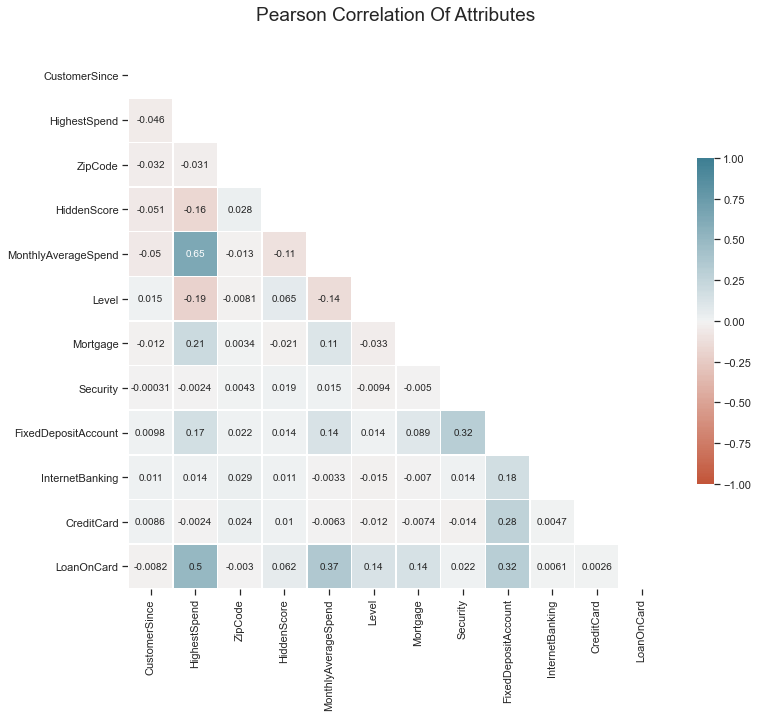

In [170]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(12,12))
corr=df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap=sns.diverging_palette(20, 220, n=200)
plt.title('Pearson Correlation Of Attributes', y=1.05, size=19)
sns.heatmap(df_new.corr(),mask=mask,linewidths=0.5,vmax=1.0,vmin=-1,center=0, 
            square=True, cmap=cmap, linecolor='white', annot=True, cbar_kws={"shrink": .5});

**Segregate predictors vs target attributes**

In [171]:
df_new = df_new.reset_index(drop=True)

In [172]:
X = df_new.drop('LoanOnCard',axis=1)
y = df_new[['LoanOnCard']]

In [173]:
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 

**Train-Test-Split**

In [174]:
X_train, X_test, y_traina y_test=train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=1)

## Logistic Regression

In [119]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.103718  2.351701 -0.006924  0.715417  0.208002  1.389288  0.076441   

          7         8         9        10  intercept  
0 -0.219729  0.824301 -0.325363 -0.479738  -4.456174  


In [120]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9558232931726908


In [143]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       900
         1.0       0.85      0.66      0.74        96

    accuracy                           0.96       996
   macro avg       0.91      0.82      0.86       996
weighted avg       0.95      0.96      0.95       996



Since there are only 2 types of prediction we can check for score in other ways as well

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.822


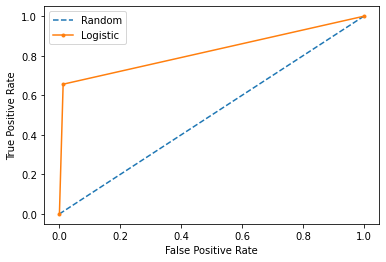

In [232]:

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_predict)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();


Trying logistic regression on another datset to check if we can get a higher value for auc

In [101]:
X2=df_new2.drop('LoanOnCard',axis=1)
y2 = df_new2[['LoanOnCard']]

In [117]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.2, stratify=y, random_state=1)

In [182]:
model2 = LogisticRegression(solver="liblinear",class_weight='balanced')
model2.fit(X2_train, y2_train)
#predict on test
y2_predict = model2.predict(X2_test)


coef_df = pd.DataFrame(model2.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0  0.029912  2.306932 -0.000054  0.511611  0.39342  1.267061  0.043676   

          7         8         9        10     intercept  
0 -0.774821  3.300138 -0.725266 -0.928064 -2.579448e-10  


In [167]:
model2_score = model2.score(X2_test, y2_test)
print(model2_score)

0.9036144578313253


Trying oversampling with **SMOTE** to check if it classifies the minority class better

In [197]:
oversample = SMOTE(k_neighbors=9,random_state=1)

Xs_train,ys_train = oversample.fit_resample(X_train, y_train)

In [192]:
Xs_test,ys_test = oversample.fit_resample(X_test, y_test)

In [196]:
# creating odd list of K for KNN
myList = list(range(3,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xs_train, ys_train)
    # predict the response
    ys_pred = knn.predict(Xs_test)
    # evaluate accuracy
    scores = accuracy_score(ys_test, ys_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 15


In [198]:
oversample = SMOTE(k_neighbors=15,random_state=1)

Xs_train,ys_train = oversample.fit_resample(X_train, y_train)

In [199]:
model3 = LogisticRegression(solver="liblinear",class_weight='balanced')
model3.fit(Xs_train, ys_train)
#predict on test
ys_predict = model3.predict(Xs_test)

In [200]:
model3_score = model3.score(Xs_test, ys_test)
print(model3_score)

0.915


In [201]:
print(classification_report(ys_test, ys_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       900
         1.0       0.91      0.92      0.92       900

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.91      1800
weighted avg       0.92      0.92      0.91      1800



Higher F1 score along with higher precision and recall values are achieved for minority class by oversampling

Confusion Matrix


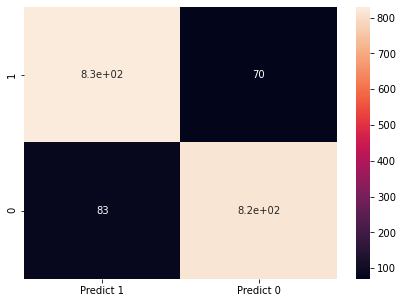

In [229]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(ys_test, ys_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

No Skill: ROC AUC=0.500
Basic Logistic: ROC AUC=0.822
SMOTE Logistic: ROC AUC=0.915


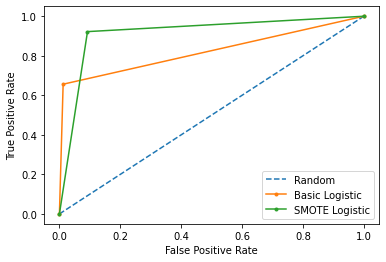

In [231]:
ns_probs = [0 for _ in range(len(ys_test))]
ns_auc = roc_auc_score(ys_test, ns_probs)
lr_auc 
lr_auc1 = roc_auc_score(ys_test, ys_predict)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Basic Logistic: ROC AUC=%.3f' % (lr_auc))
print('SMOTE Logistic: ROC AUC=%.3f' % (lr_auc1))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ys_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict)
lr_fpr1, lr_tpr1, _ = roc_curve(ys_test, ys_predict)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Basic Logistic')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='SMOTE Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

Oversampling thus gives a better prediction here for classifying the minority class.<br>
This model gives is more capable of handling minority classes with only a dip of 3% in overall accuracy.<br>
We can see directly from grap hmuch more improved value for True Positive Rate and a small drop in False Positive Rate.

## Naive Bayes

In [215]:
# create the model
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [218]:
y_trainpredict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)


In [223]:
#performance on training data
nb_predict = nb.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict)))

Model Accuracy: 0.8820


In [225]:
#performance on testing data
nb_predict = nb.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict)))

Model Accuracy: 0.9016


In [249]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       900
         1.0       0.49      0.64      0.55        96

    accuracy                           0.90       996
   macro avg       0.73      0.78      0.75       996
weighted avg       0.91      0.90      0.91       996



Overall accuracy is good but classification of minority isnt that great.

Confusion Matrix


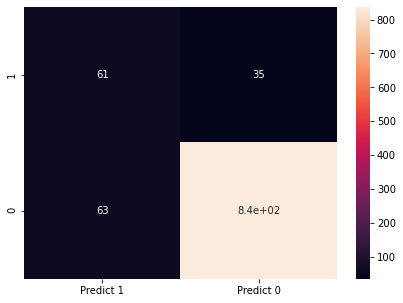

In [233]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, nb_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [234]:
from sklearn.inspection import permutation_importance

In [235]:
# If shuffling a feature to check if removing any can  made the model perform better
imps = permutation_importance(nb, X_test, y_test)
print(imps.importances_mean)

[ 0.         -0.00140562  0.          0.00100402 -0.00823293  0.00160643
 -0.00140562 -0.00060241  0.03052209  0.          0.        ]


In [239]:
#Trying Bernoulli Naive Bayes for binary target 
from sklearn.naive_bayes import BernoulliNB

In [240]:
nbb = BernoulliNB()
nbb.fit(X_train, y_train)

BernoulliNB()

In [241]:
#performance on training data
nbb_predict = nbb.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nbb_predict)))

Model Accuracy: 0.9182


In [242]:
#performance on testing data
nbb_predict = nbb.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nbb_predict)))

Model Accuracy: 0.9177


In [251]:
print(classification_report(y_test, nbb_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       900
         1.0       0.61      0.40      0.48        96

    accuracy                           0.92       996
   macro avg       0.78      0.68      0.72       996
weighted avg       0.91      0.92      0.91       996



Confusion Matrix


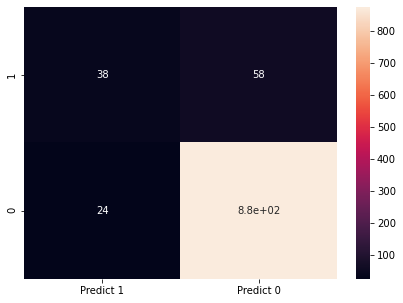

In [244]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, nbb_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

No Skill: ROC AUC=0.500
Basic Logistic: ROC AUC=0.822
SMOTE Logistic: ROC AUC=0.915
Gaussian Naive Bayes: ROC AUC=0.783
Bernoulli Naive Bayes: ROC AUC=0.685


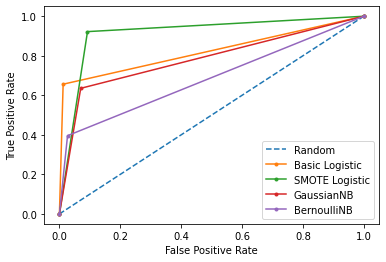

In [260]:
ns_probs = [0 for _ in range(len(ys_test))]
ns_auc = roc_auc_score(ys_test, ns_probs)
lr_auc 
lr_auc1 = roc_auc_score(ys_test, ys_predict)
nb_auc1 = roc_auc_score(y_test, nb_predict)
nb_auc2 = roc_auc_score(y_test, nbb_predict)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Basic Logistic: ROC AUC=%.3f' % (lr_auc))
print('SMOTE Logistic: ROC AUC=%.3f' % (lr_auc1))
print('Gaussian Naive Bayes: ROC AUC=%.3f' % (nb_auc1))
print('Bernoulli Naive Bayes: ROC AUC=%.3f' % (nb_auc2))



# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ys_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict)
lr_fpr1, lr_tpr1, _ = roc_curve(ys_test, ys_predict)
nb_fpr1, nb_tpr1, _ = roc_curve(y_test, nb_predict)
nb_fpr2, nb_tpr2, _ = roc_curve(y_test, nbb_predict)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Basic Logistic')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='SMOTE Logistic')
pyplot.plot(nb_fpr1, nb_tpr1, marker='.', label='GaussianNB')
pyplot.plot(nb_fpr2, nb_tpr2, marker='.', label='BernoulliNB')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

**Conclusion**

**Dataset Analysis**<br>
Age and Zipcode by itself wasnt enough to give meaningful information to the dataset.<br>
Customers with a mortgage plus on average with higher monthly spend should be the target customers to advertise for loan<br>
The hidden score calculation seemed to be a very good indicator on whom the bank should focus on to reach objective.<br>
Monthly average spend was a better feature than highest spend.<br>
More variety in features are needed to understand the customer and the need for loan, understanding that can help make specific types of targeted schemes <br>
If possible more data of customers who have a loan should be collected since a model trained of synthetically generated data might not be a good model to anticipate new data and predict fot the new imbalance.
Customer Income is also important to understand expenditure feature.<br>
The bank balance or net transaction histories itself might give a good indication.<br>
For those with loan it would be meaningful to know what kind/purpose loan has the customer applied for as well as the value.<br>
Factors like credit history or loans repayed or existing can add more understanding to the columns HiddenScore or Level.<br>
If customer has dependents can also influence if they want to take loan on someone elses behalf.

**Model Analysis**<br>
The class imbalance had some influence on analysis.<br>
Logistic regression can a better model although both were close.<be>
If we compare the best naive Bayes model to the the best Logistic regression model.<br>
The smote model on linear regression is giving the best result so far on logistic regression.<br>
Since there is no weight balance paramenter the misbalanced data cannot be predicted as well as the regression model